# Polynomial regresion
```
Shivam Kumaran
SC17B122
Date - 9/11/2020
```

In [13]:
import numpy as np 
from matplotlib import pyplot as plt
from matplotlib import gridspec as gs 
plt.rcdefaults()
#plt.style.use('seaborn-whitegrid')
plt.style.use('seaborn-dark-palette')

### Note -  
In the program <b>poy_fit.py</b> call this function - 
```
analysis(order , print_all=True , plot_all = True)
```
- Parameters
    - order - order of polyomial to be fitted , example 3 for quadratic
    - print_all : set True to print the result
    - plot_all : set True to plot the results

## Linear Equation Solving routines

### Matrix Multiplication

In [14]:
def dot(v1,v2):
    return(sum([e1*e2 for e1,e2 in zip(v1,v2)]))

def m_multiply(m1,m2):
    m1 = np.asarray(m1)
    m2 = np.asarray(m2)
    i = m1.shape[0]
    j1 = m1.shape[1]
    j2 = m2.shape[0]
    k = m2.shape[1]
    if(j1==j2):
        m_final = np.zeros((i,k))
        for i_itr in range(i):
            for k_itr in range(k):
                v1 = m1[i_itr,:]
                v2 = m2[:,k_itr]
                m_final[i_itr][k_itr] = dot(v1,v2)
        return m_final
    else :
        raise ValueError('dim invalid')


### Solving Linear equation

In [15]:
def update_row(r2,r1):
    coeff = r2[0]/r1[0]
    r_temp = r2 - coeff*r1
    return(r_temp)

def update_sub_mat(mat):
    m_temp = []
    m_temp.append(mat[0])
    for i in range(1,np.shape(mat)[0]):
        m_temp.append(update_row(mat[i],mat[0]))
    return (np.asarray(m_temp) )

def calc_ecl(m):
    temp_mat = np.copy(m)
    for i in range(len(temp_mat)):
        temp_mat[i:,i:] = update_sub_mat(temp_mat[i:,i:])
    return(temp_mat)

def calc_row_sol(mat_vec,sol_vec):
    sol = (mat_vec[-1] - np.dot(mat_vec[1:-1],sol_vec))/mat_vec[0]
    return(sol)

def solve_mat_eqn(m,b_vec):
    
    if(np.shape(m)[0]!=len(b_vec)):
        raise ValueError('Matrix and vector dim mismatch')
    else:
        mat_given = np.column_stack((m,b_vec))
        mat = calc_ecl(mat_given)
        sol_vec = []
        for i in reversed(range(np.shape(mat)[0])):
            sol_vec.insert(0,calc_row_sol(mat[i,i:],sol_vec))
        return(sol_vec)


## Data Given 

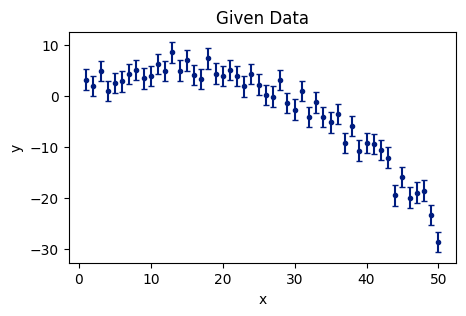

In [16]:
data = np.loadtxt('data2')
x = data[:,0]
y = data[:,1]
sigma = data[:,2]
fig = plt.figure(figsize=(5,3))
ax = fig.add_subplot(111)
ax.errorbar(x,y,yerr=sigma , fmt= '.' , capsize = 2)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Given Data')
plt.show()

### Model Polynimial definition

In [17]:
def poly(x,a):
    val = sum([a[j]*(x**(j)) for j in range(1,len(a))])
    return val

## Polynomial Regression

In [18]:
def regression(x,y,sigma,order):
    A = []
    for i in range(len(x)):
        temp = [(x[i]**j)/(sigma[i]) for j in range(order)]
        A.append(temp)
    A = np.asarray(A)
    b = np.asarray([y_i/sigma_i for y_i,sigma_i in zip(y,sigma)])
    b = np.reshape(b , (len(b),1))
    alpha = m_multiply(A.T , A)
    beta = m_multiply(A.T ,b)
    var_params = [alpha[i][i] for i in range(len(alpha))] 
    params = np.asarray(solve_mat_eqn(alpha ,beta))
    cov_mat = np.asarray(np.linalg.inv(alpha))
    return params , cov_mat

def cal_chi(y,y_mod,sigma):
    y_mod = poly(x , params)
    residuals = y_mod - y
    chi_sq_arr = [((y[i]-y_mod[i])**2)/(sigma[i]**2) for i in range(len(y))]
    chi_sq = sum(chi_sq_arr)
    print('Chi sq = ' , chi_sq)
    dof = len(y)-len(params)
    red_chi_sq = chi_sq/dof
    print(red_chi_sq) 

In [19]:
def analysis(order , print_all =True, plot_all=True):
    params , cov = regression(x,y,sigma,order)
    p_err = np.asarray([cov[i][i]**0.5 for i in range(len(cov))])
    np.set_printoptions(precision=4)
    y_mod = poly(x , params)
    residuals = y_mod - y
    chi_sq_arr = [((y[i]-y_mod[i])**2)/(sigma[i]**2) for i in range(len(y))]
    chi_sq = sum(chi_sq_arr)
    dof = len(y)-len(params)
    red_chi_sq = chi_sq/dof

    if(print_all):
        print('Polynomial of degree : ', order-1)
        print('______________________________')
        print('\nparameters:')
        print(params)
        print('\nErrors:')
        print(p_err)
        print('______________________________')
        print('Chi sq = %.4f' %chi_sq)
        print('Reduced Chi sq = %.4f' %red_chi_sq) 

    #Plot title and text generation
    if(plot_all):
        title = 'y='
        textbox = '$\chi^2 = {:.4f}$'.format(chi_sq)+'\n$\chi^2/dof = {:.4f}$\n'.format(red_chi_sq)
        for i in range(0,order):
            if(i==0):
                title += '$a_'+str(i)+'x^'+str(i)+'$'
            else:
                title += '+$a_'+str(i)+'x^'+str(i)+'$'
            textbox += '\n$a_'+str(i)+' = {:.4f} \pm {:.4f}$'.format(params[i] , p_err[i]) 

        fig = plt.figure(figsize=(8,6) , constrained_layout=True)
        spec = gs.GridSpec(nrows=2, ncols = 1 , height_ratios=[1,0.2] , hspace=0)
        ax = fig.add_subplot(spec[0,0])
        ax.errorbar(x,y,yerr=sigma , fmt= '.' , capsize = 2)
        #ax.set_title('Model')
        ax.set_ylabel('y')
        ax.plot(x,y_mod)
        ax.legend([title , 'given data'])

        #ax.text(0,-20 ,  ,bbox = {'facecolor':'blue' , 'alpha':0.2} , fontsize = 10)
        pad = 0
        ax.text(0,np.amin(y) , textbox ,bbox = {'facecolor':'blue' , 'alpha':0.2 } , fontsize = 10)
        #plt.style.use('bmh')
        res_plot = fig.add_subplot(spec[1,0],sharex=ax)
        res_plot.errorbar(x,residuals , yerr=sigma , fmt='.' , color='k' , capsize = 2)
        res_plot.set_ylabel('residuals')
        res_plot.set_xlabel('x')
        res_plot.axhline(np.mean(residuals) , linewidth=0.5)
        plt.show()
        #print(y_mod)


## Result

Polynomial of degree :  2
______________________________

parameters:
[ 0.9643  0.6458 -0.0231]

Errors:
[0.8836 0.0799 0.0015]
______________________________
Chi sq = 50.5905
Reduced Chi sq = 1.0764


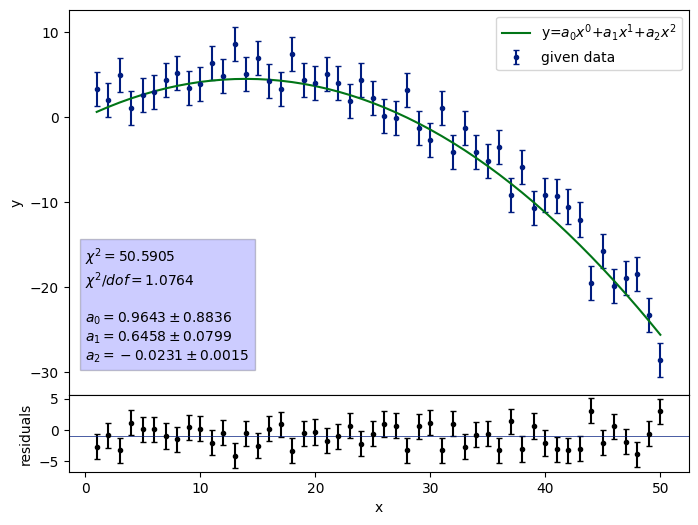

In [20]:
analysis(3 , print_all=1 , plot_all=True)

Polynomial of degree :  1
______________________________

parameters:
[11.1955 -0.5347]

Errors:
[0.5743 0.0196]
______________________________
Chi sq = 1837.8000
Reduced Chi sq = 38.2875


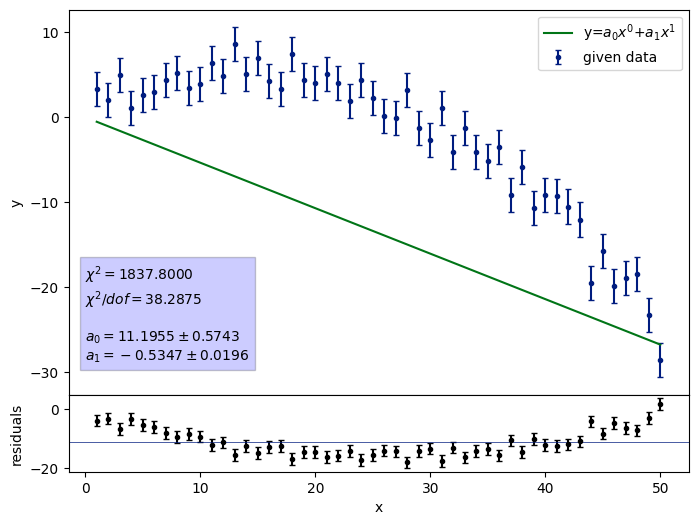

In [21]:
analysis(2 , print_all=1 , plot_all=True)

Polynomial of degree :  3
______________________________

parameters:
[ 1.7454e+00  4.7067e-01 -1.4645e-02 -1.1115e-04]

Errors:
[1.2218e+00 2.0543e-01 9.3101e-03 1.2007e-04]
______________________________
Chi sq = 76.1903
Reduced Chi sq = 1.6563


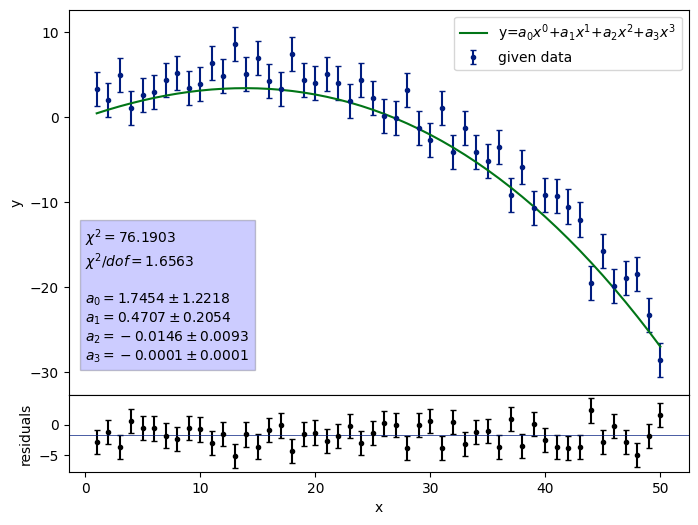

In [22]:
analysis(4 , print_all=1 , plot_all=True)

## Conclusion
> Best fit is given by quadratic polynomial 

> Best fit reduced $\chi^2$ = 1.07
